# <span style='background:black'><span style='color:Cyan'> <span style='font-family:"Times New Roman"'> Copyright statement: 
#### <span style='font-family:"Times New Roman"'>I have used some parts of provided code by `https://benalexkeen.com/k-means-clustering-in-python/` in this project. 

# <span style='background:black'><span style='color:Cyan'> <span style='font-family:"Times New Roman"'> Objective: 
## <span style='font-family:"Times New Roman"'>In this project, Circular Symmetric Gaussian Dataset is classified using batch K-means algorithm also known as offline K-means. 

### <span style='font-family:"Times New Roman"'>Loading Required Modules:

In [1]:
import matplotlib.pyplot as plt
from matplotlib import style
import pandas as pd
import numpy as np
import math
import copy
style.use('ggplot')

### <span style='font-family:"Times New Roman"'>Implemented Functions:  

In [2]:
def update(k):
    for i in centroids.keys():
        centroids[i][0] = np.mean(df[df['closest'] == i]['x'])
        centroids[i][1] = np.mean(df[df['closest'] == i]['y'])
    return k

In [3]:
def circGuass(N,Me,Var):
    dimension = len(Me)
    a = np.array(Me)
    p = np.random.randn(dimension,N)
    h = np.tile(a, (2, N//2))
    x = math.sqrt(Var) * p + h
    return x

In [4]:
def assignment(df, centroids):
    for i in centroids.keys():
        
        
        
        # Euclidean distance formula
        #***************************
        df['distance_from_{}'.format(i)] = (
            np.sqrt(
                (df['x'] - centroids[i][0]) ** 2
                + (df['y'] - centroids[i][1]) ** 2
            )
        )
        #***************************
        
        
    centroid_distance_cols = ['distance_from_{}'.format(i) for i in centroids.keys()]
    df['closest'] = df.loc[:, centroid_distance_cols].idxmin(axis=1)
    df['closest'] = df['closest'].map(lambda x: int(x.lstrip('distance_from_')))
    df['color'] = df['closest'].map(lambda x: colmap[x])
    return df

### <span style='font-family:"Times New Roman"'>Generating Circular Symmetric Gaussian Dataset:

In [5]:
M1 = 0
M2 = 5
Var = 3
N = 250
firstmean = [M1, M1]
secondmean = [M2, M2]
Me = firstmean;
X = circGuass(N, Me, Var)
rowonex= X[0]
rowtwox = X[1]
Me = secondmean
Y = circGuass(N, Me, Var)
rowoney= Y[0]
rowtwoy = Y[1]
X = X.T
Y = Y.T
H = np.concatenate((X,Y))

df = pd.DataFrame({
    'x': H[:,0],
    'y': H[:,1]
})
df_elements = df.sample()

### <span style='font-family:"Times New Roman"'> Initializing K-means: 

In [6]:
k = int(input("Number of centroids (in this problem k = 2): "))

Number of centroids (in this problem k = 2): 2


In [7]:
centroids = {
    i+1: [np.random.randint(0, 5), np.random.randint(0, 5)]
    for i in range(k)
}

Initial  centroids:
{1: [4, 0], 2: [3, 3]}


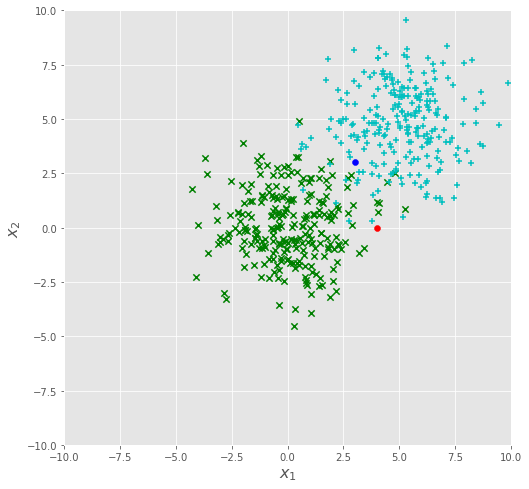

In [8]:
print("Initial  centroids:")
print(centroids)    
fig = plt.figure(figsize=(8, 8))
plt.scatter(rowonex,rowtwox , color='g' , marker = 'x', s = 40)
plt.scatter(rowoney,rowtwoy , color='c' , marker = '+', s = 40)
colmap = {1: 'r', 2: 'b'}
for i in centroids.keys():
    plt.scatter(*centroids[i], color=colmap[i])
plt.xlim(-10, 10)
plt.ylim(-10, 10)
plt.xlabel('$x_1$', fontsize=16)
plt.ylabel('$x_2$', fontsize=16)
plt.show()

          x         y  distance_from_1  distance_from_2  closest color
0 -2.355330 -0.036655         6.355436         6.156365        2     b
1 -0.228230  0.651076         4.278064         3.992357        2     b
2  0.022968  2.408431         4.649443         3.035239        2     b
3 -3.697355  3.196565         8.334705         6.700239        2     b
4 -2.544283  2.151680         6.888931         5.608808        2     b


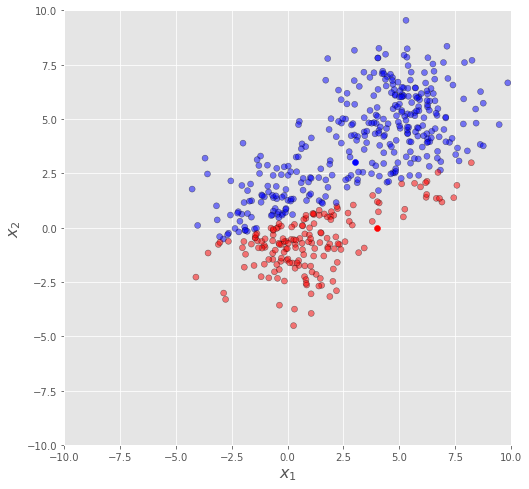

In [9]:
df = assignment(df, centroids)
print(df.head())

fig = plt.figure(figsize=(8, 8))
plt.scatter(df['x'], df['y'], color=df['color'], alpha=0.5, edgecolor='k')
for i in centroids.keys():
    plt.scatter(*centroids[i], color=colmap[i])
plt.xlim(-10, 10)
plt.ylim(-10, 10)
plt.xlabel('$x_1$', fontsize=16)
plt.ylabel('$x_2$', fontsize=16)
plt.show()

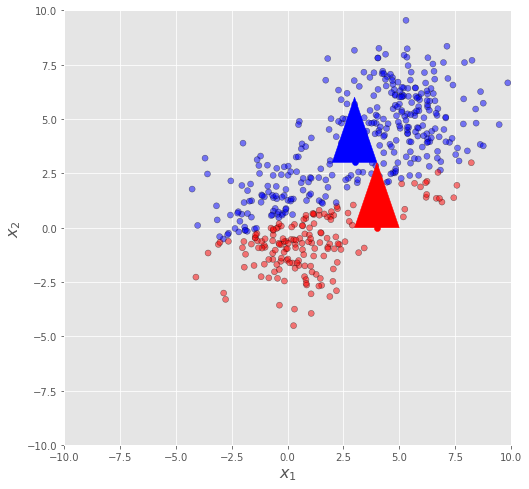

In [10]:
old_centroids = copy.deepcopy(centroids)
fig = plt.figure(figsize=(8, 8))
ax = plt.axes()
plt.scatter(df['x'], df['y'], color=df['color'], alpha=0.5, edgecolor='k')
for i in centroids.keys():
    plt.scatter(*centroids[i], color=colmap[i])
plt.xlim(-10, 10)
plt.ylim(-10, 10)
for i in old_centroids.keys():
    old_x = old_centroids[i][0]
    old_y = old_centroids[i][1]
    dx = (centroids[i][0] - old_centroids[i][0]) * 0.75
    dy = (centroids[i][1] - old_centroids[i][1]) * 0.75
    ax.arrow(old_x, old_y, dx, dy, head_width=2, head_length=3, fc=colmap[i], ec=colmap[i])
plt.xlim(-10, 10)
plt.ylim(-10, 10)
plt.xlabel('$x_1$', fontsize=16)
plt.ylabel('$x_2$', fontsize=16)
plt.show()

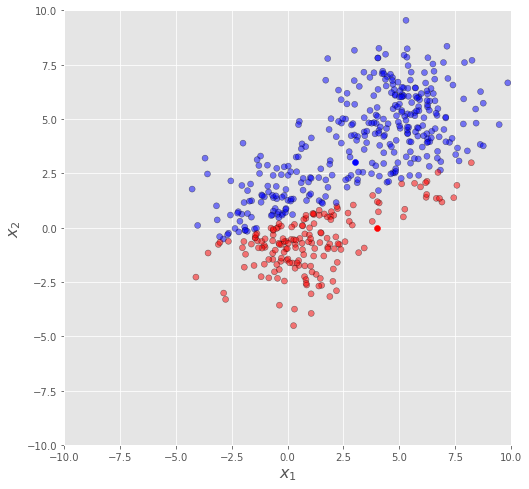

In [11]:
## Repeat Assigment Stage

df = assignment(df, centroids)

# Plot results
fig = plt.figure(figsize=(8, 8))
plt.scatter(df['x'], df['y'], color=df['color'], alpha=0.5, edgecolor='k')
for i in centroids.keys():
    plt.scatter(*centroids[i], color=colmap[i])
plt.xlim(-10, 10)
plt.ylim(-10, 10)
plt.xlabel('$x_1$', fontsize=16)
plt.ylabel('$x_2$', fontsize=16)
plt.show()

Loop count:
2
Loop count:
3
Loop count:
4
Loop count:
5
Loop count:
6
Loop count:
7


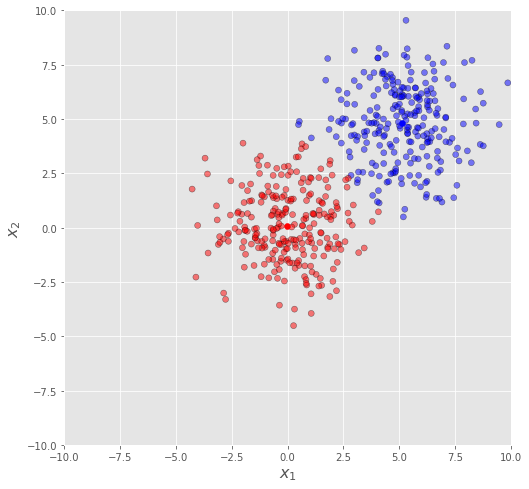

In [12]:
count = 1
while True:
    count = count+1
    print("Loop count:")
    print(count)
    closest_centroids = df['closest'].copy(deep=True)
    centroids = update(centroids)
    df = assignment(df, centroids)
    if closest_centroids.equals(df['closest']):
        break

fig = plt.figure(figsize=(8, 8))
plt.scatter(df['x'], df['y'], color=df['color'], alpha=0.5, edgecolor='k')
for i in centroids.keys():
    plt.scatter(*centroids[i], color=colmap[i])
plt.xlim(-10, 10)
plt.ylim(-10, 10)
plt.xlabel('$x_1$', fontsize=16)
plt.ylabel('$x_2$', fontsize=16)
plt.show()